In [7]:
# from itertools import chain
# from itertools import product
import numpy as np
import anndata as ad
import pandas as pd
import scanpy as sc
# import scanpy.external as sce
# import scvelo as scv
# import cellrank as cr
# import harmonypy as harmony
# import seaborn as sns
# from scipy import io
# from scipy import sparse

In [8]:
import os
os.chdir('/local/workdir/dwm269/scCardiacOrganoid/')

In [9]:
from scripts.py.scantils import *
# from scripts.py.scanplots import *

In [10]:
# Load data
adata = sc.read_h5ad(
    # filename="data/pyobjs/scCO_v7-3.h5ad" 
    filename="data/pyobjs/scCO_v1b.h5ad" 
)

# Run PAGA

In [11]:
# sc.pp.neighbors(
#     adata,
#     n_neighbors=500,
#     n_pcs=50,#npcs(adata,reduction="harmony_sp"),
#     use_rep="harmony_sp",
#     key_added="harmony_sp_neighbors"
# )

In [12]:
sc.tl.paga(
    adata,
    groups='cell_types_level2',
    neighbors_key='harmony_sp_neighbors'
)

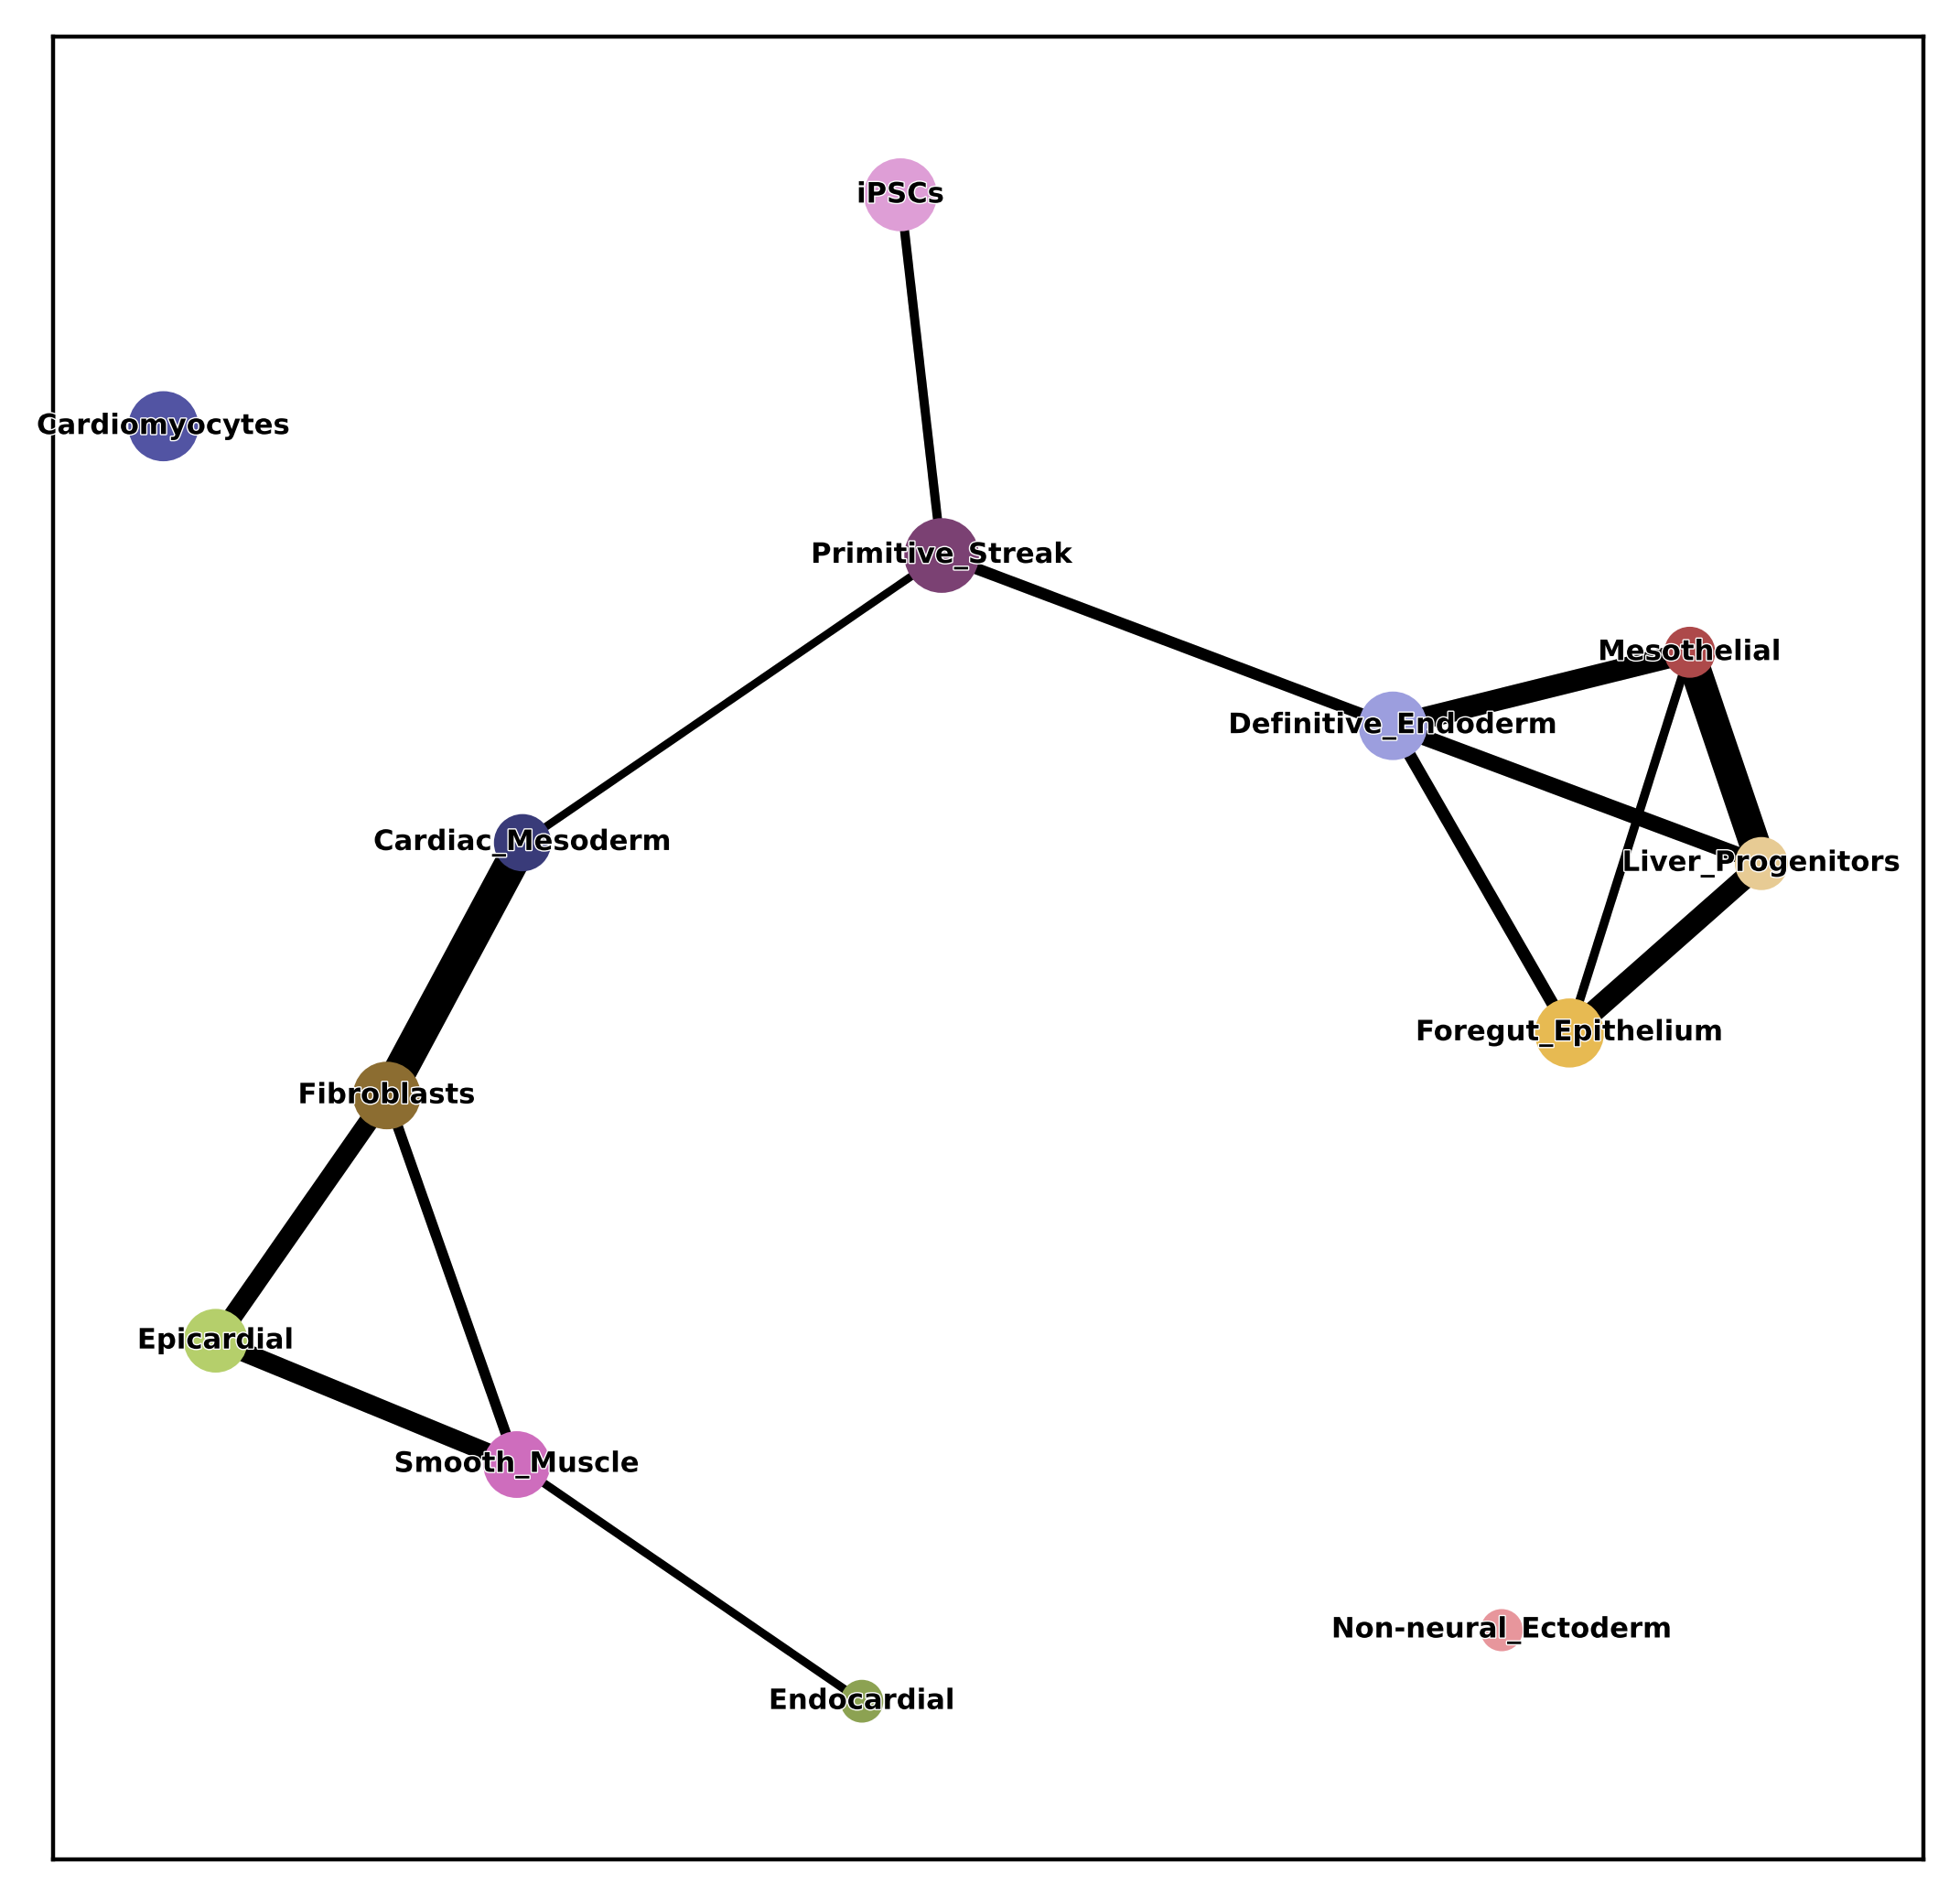

In [13]:
sc.set_figure_params(
    figsize=(6,6),
    fontsize=6,
    transparent=True,
    dpi=200
)
sc.pl.paga(
    adata, 
    color=['cell_types_level2'],
    threshold=0.1,
    # normalize_to_color =True,
    dashed_edges ="connectivities",
    fontoutline=0.5
)

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


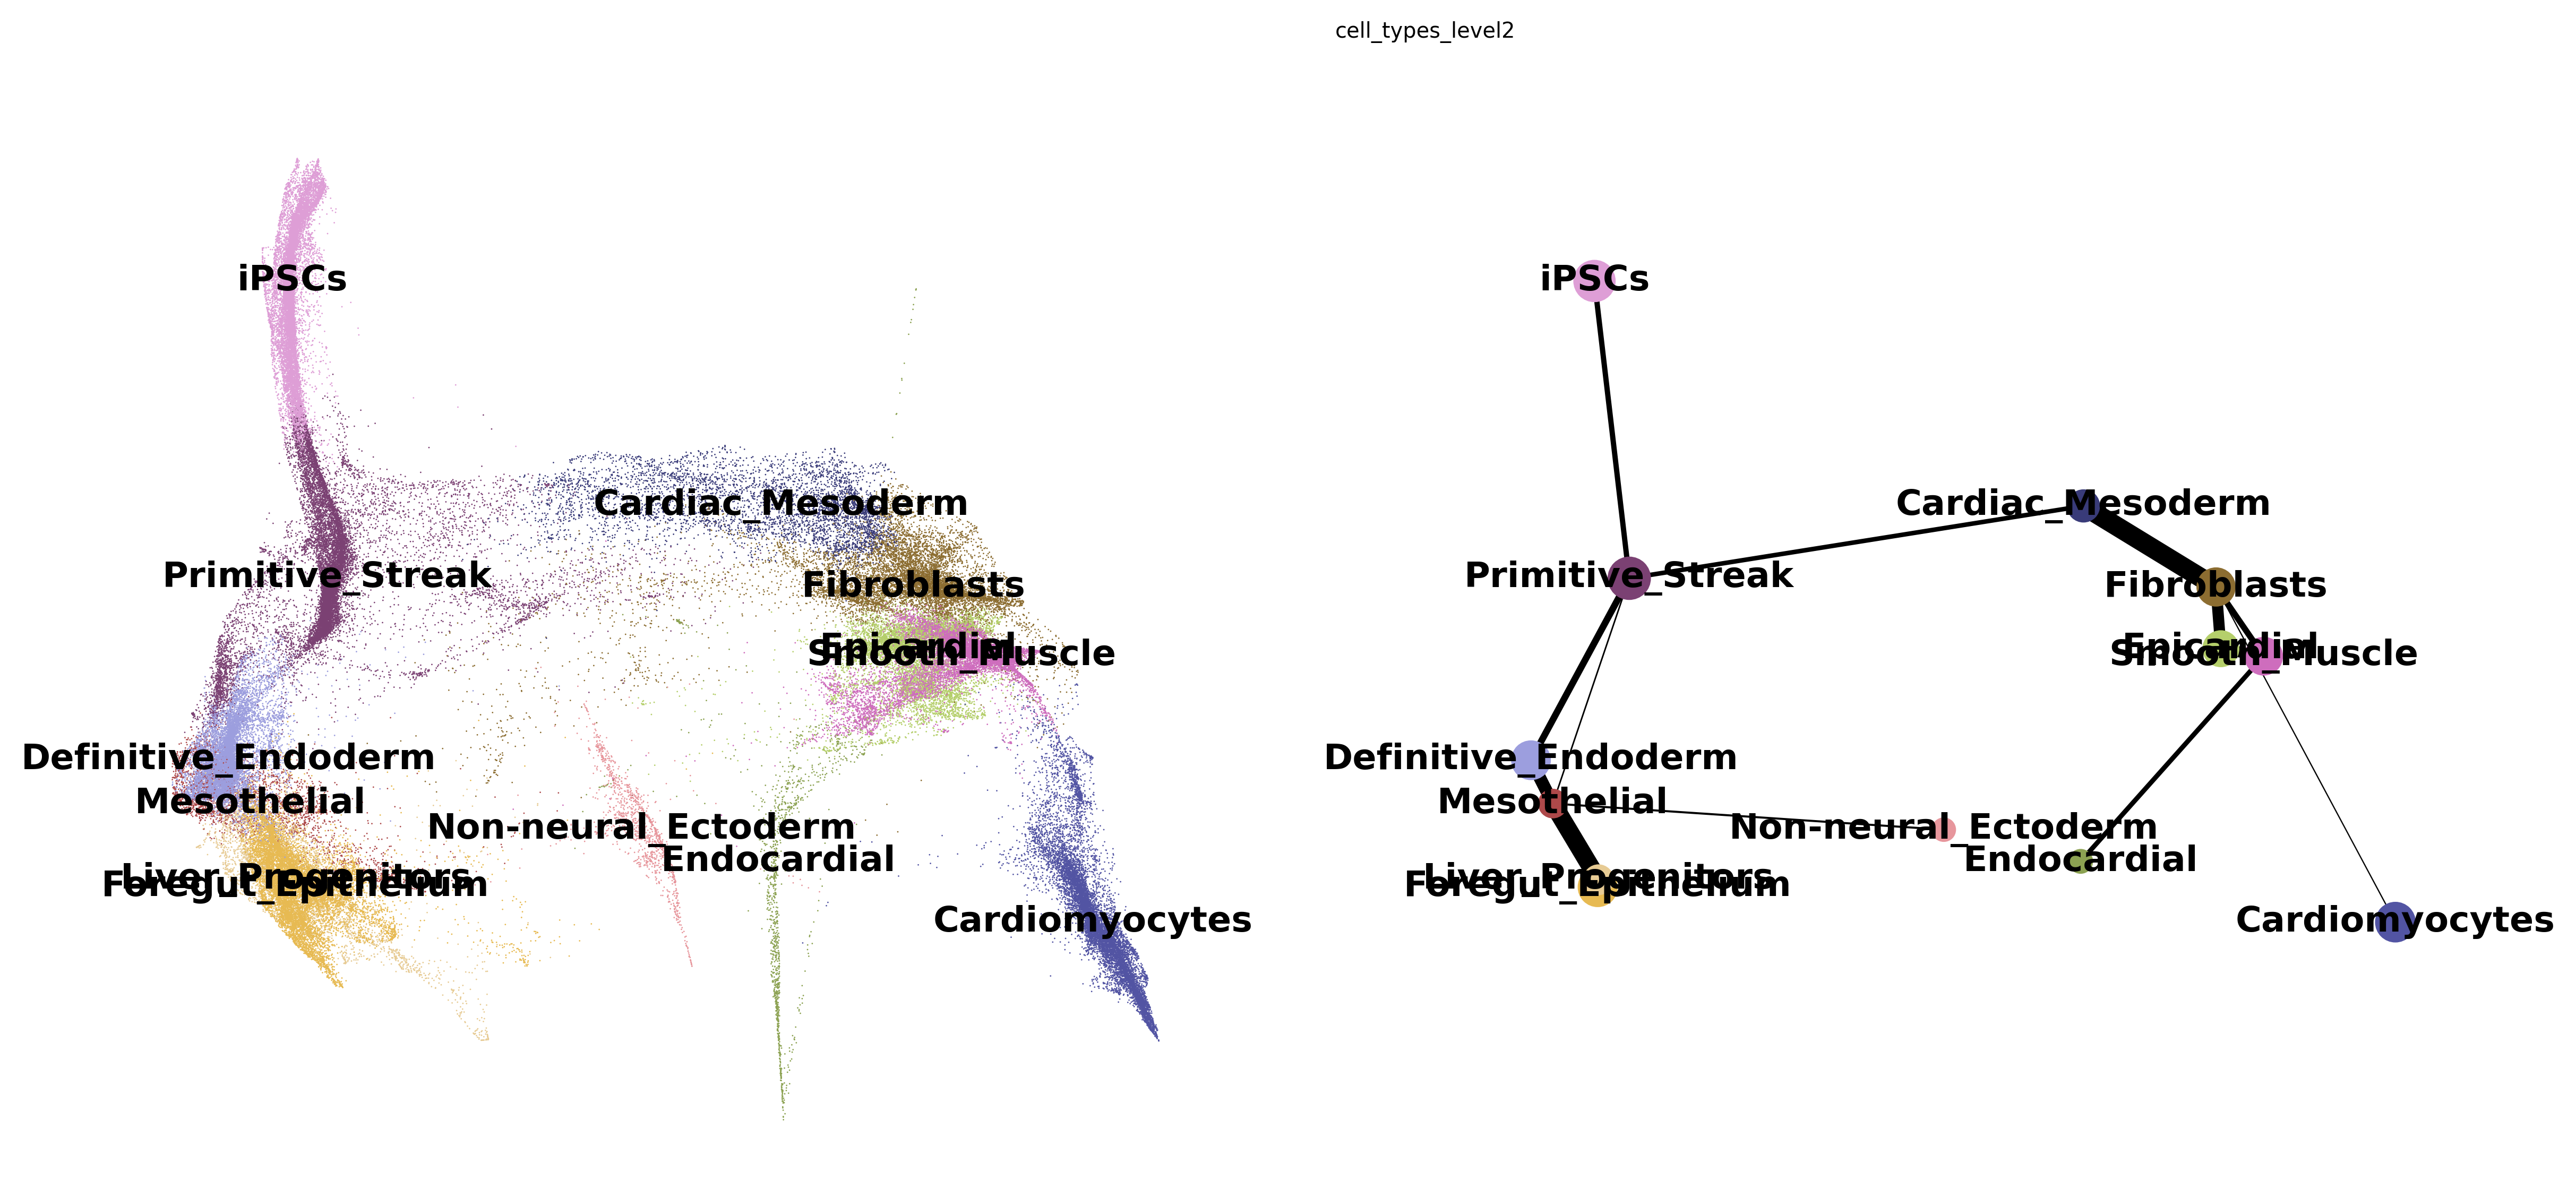

In [14]:
sc.pl.paga_compare(
    adata, 
    basis='phate_harmony_sp',
    threshold=0.05,
    right_margin=0.2, size=1, 
    legend_fontsize=12, fontsize=12, 
    frameon=False, edges=False,
    # edge_width_scale=0.1,
    save=True
)

In [15]:
sc.tl.diffmap(
    adata, 
    neighbors_key='harmony_sp_neighbors'
)

In [16]:
sc.tl.draw_graph(
    adata, 
    neighbors_key='harmony_sp_neighbors',
    layout='fa', 
    init_pos='paga'
)

Compute pseudotime with `dpt`

In [17]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['cell_types_level2']  == 'iPSCs')[0]

In [18]:
sc.tl.dpt(
    adata,
    # n_branchings=1,
    neighbors_key='harmony_sp_neighbors'
)

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


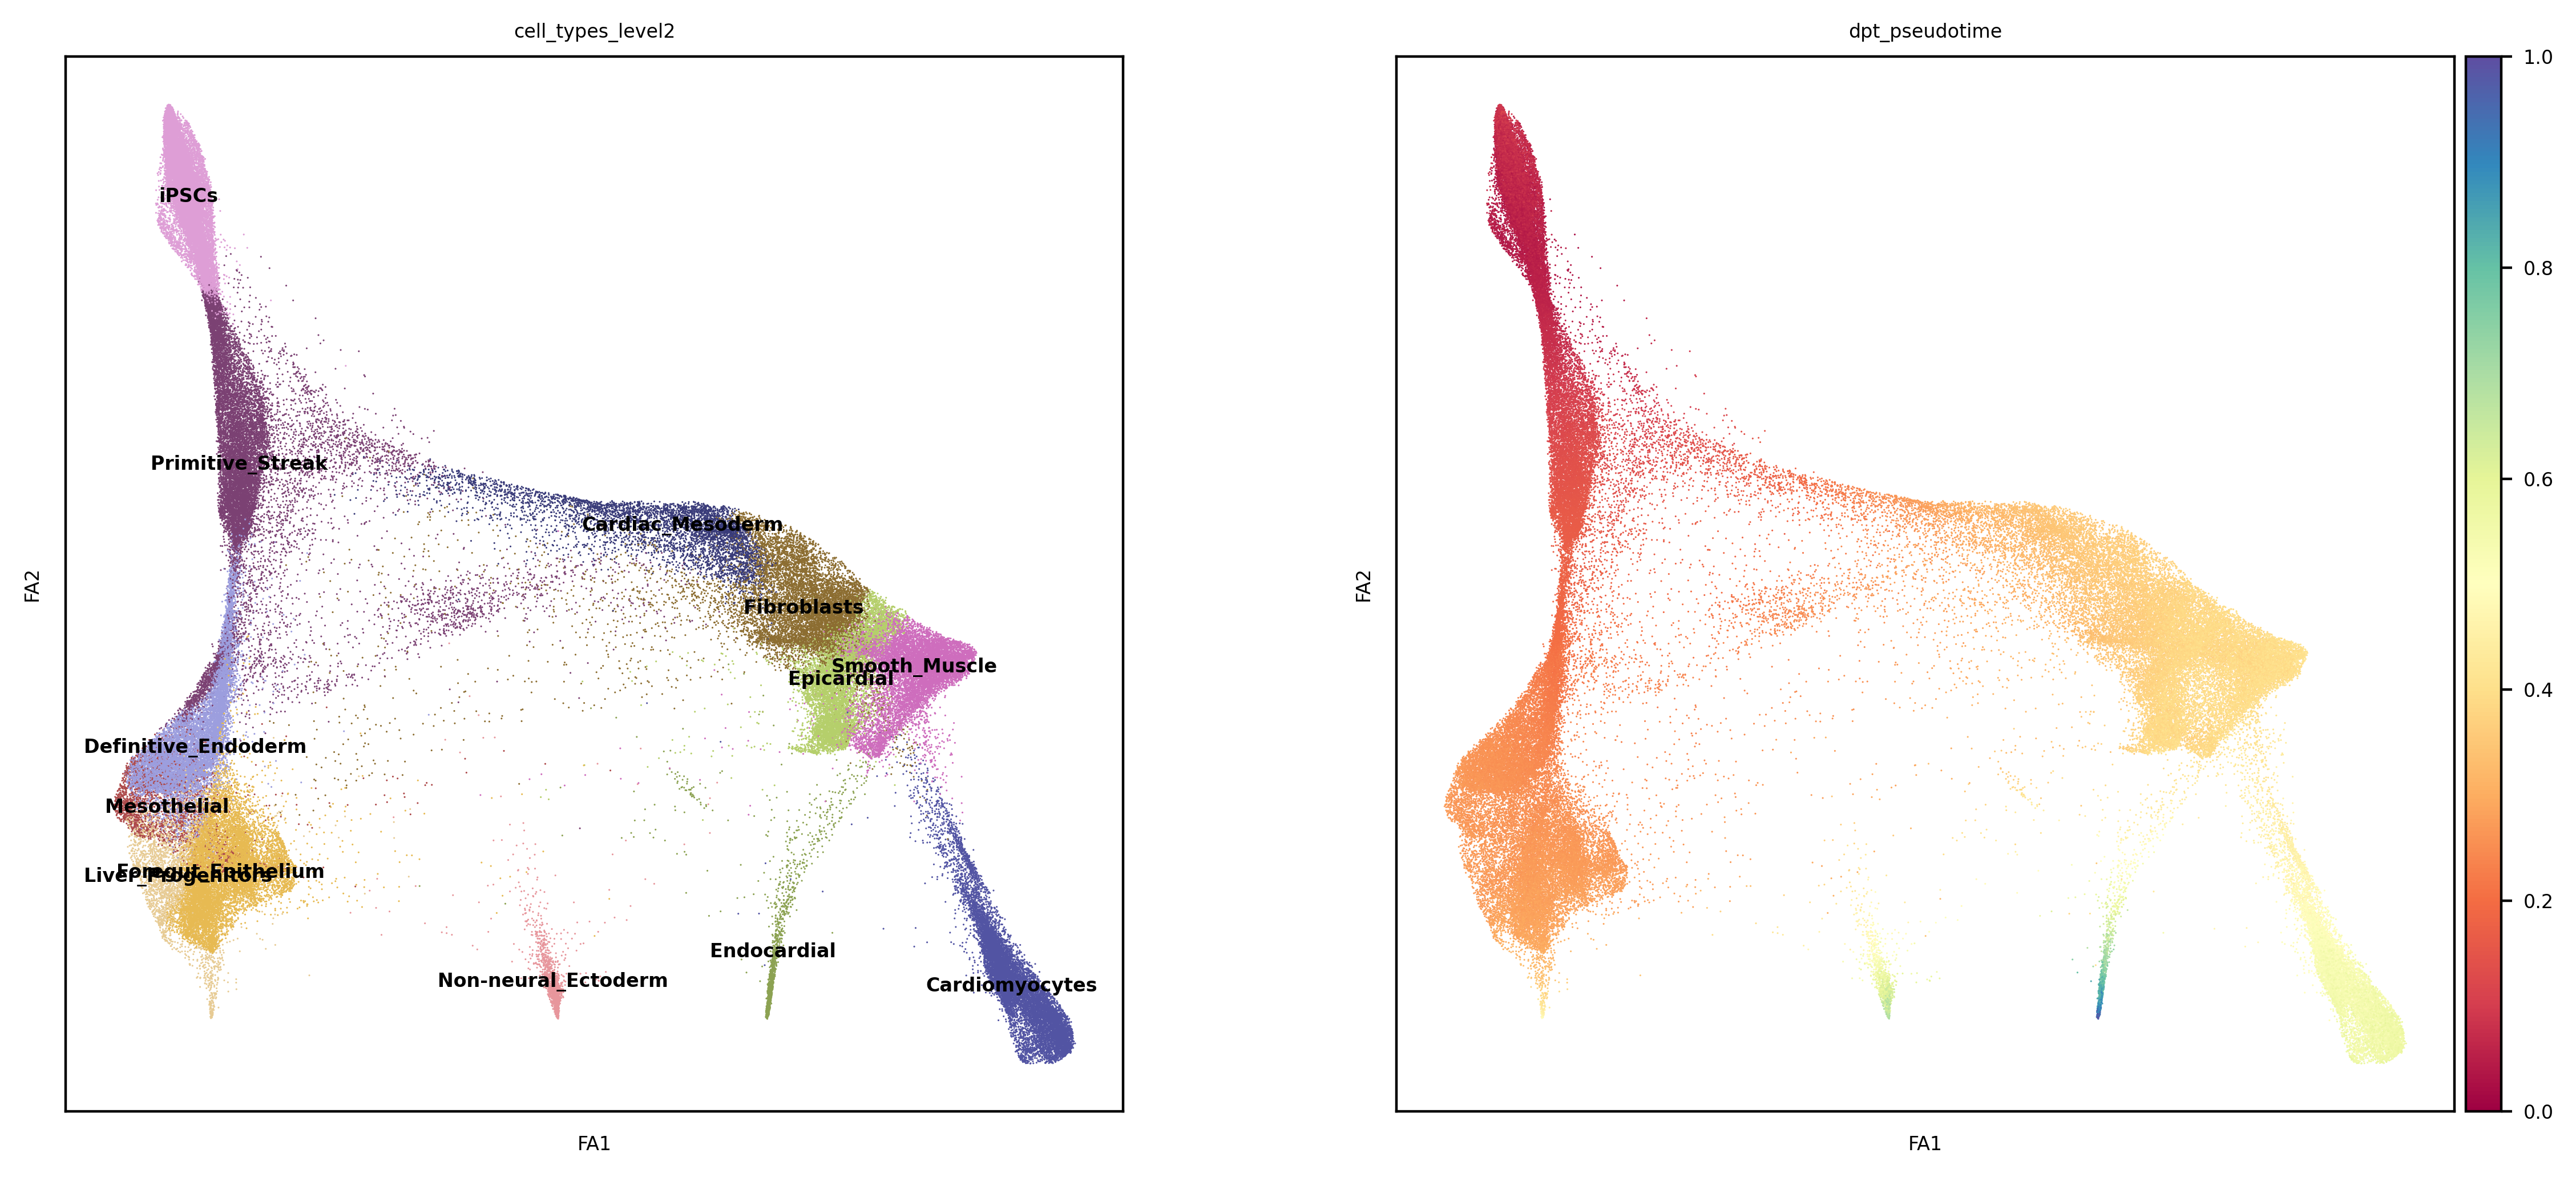

In [19]:
sc.pl.draw_graph(
    adata, color=['cell_types_level2', 'dpt_pseudotime'], 
    cmap = 'Spectral',
    legend_loc='on data'
)

Re-draw PHATE embedding w/ PAGA & pseudotime info

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


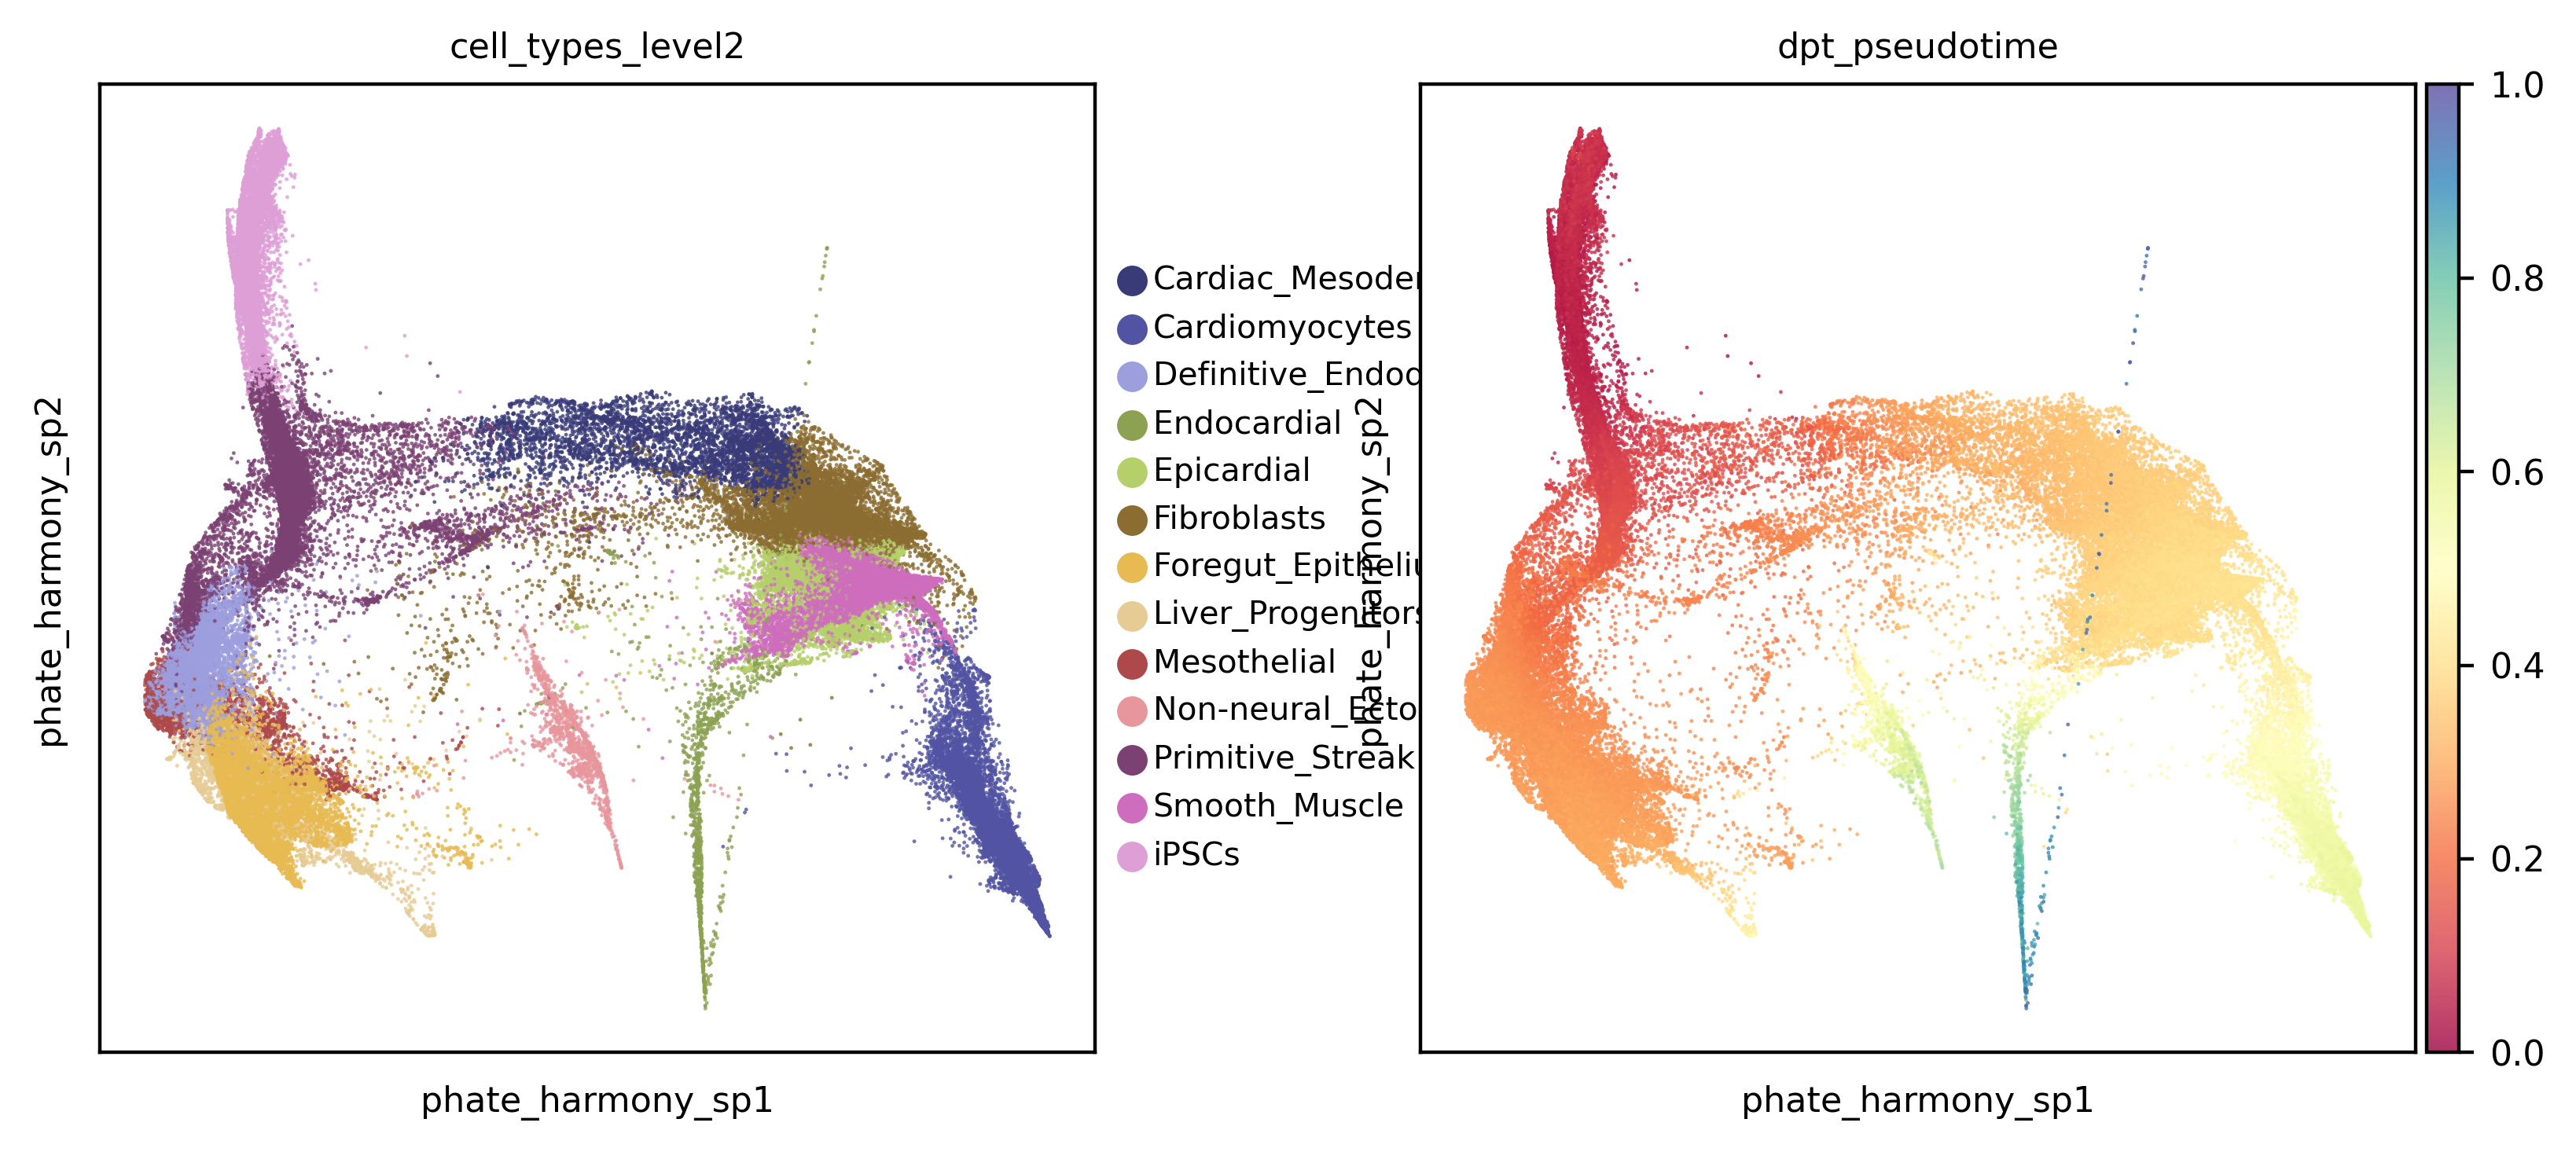

In [20]:
sc.set_figure_params(
    figsize=(4,4),
    fontsize=8,
    transparent=False,
    dpi=200
)
sc.pl.embedding(
    adata,
    basis='phate_harmony_sp',
    color=['cell_types_level2', 'dpt_pseudotime'], #,'pattern'
    # edges=True, edges_width=0.01,
    # legend_loc='on data', legend_fontsize=6, legend_fontoutline=0.75, #labels on plot
    palette='tab20b',
    cmap='Spectral',
    size=3, alpha=0.8,
    sort_order=True,
#     return_fig=True,
    ncols=3
)

Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 

'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 

'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# Save preprocessed object for future analyses (python & R)

In [53]:
# Save h5ad object for subsequent analyses
adata.write(
    # filename="data/pyobjs/scCO_v7-4.h5ad"
    filename="data/pyobjs/scCO_v1c.h5ad"
)